## Projekt Crowdfunding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
# Unklar inwieweit die Daten aufgebaut sind, Sie scheinen sich nicht zu addieren
imp=r'C:\Users\bosse\Desktop\Notebooks\Data\Project\Webrobots_may_2023.csv'
df_imp=pd.read_csv(imp)
df=df_imp

In [3]:
# Umwandeln der Zeitangaben
import datetime
df['created_at'].value_counts()
df['created_at']=pd.to_datetime(df['created_at'],unit='s')
df['state_changed_at']=pd.to_datetime(df['state_changed_at'],unit='s')
df['deadline']=pd.to_datetime(df['deadline'],unit='s')
df['launched_at']=pd.to_datetime(df['launched_at'],unit='s')
def get_year(x):
    return x.year
df['created_year']=df['launched_at'].apply(get_year)

### Businesscases und Datavisualization

In [4]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type,created_year
0,58,"A portable parabolic microphone, designed to l...","{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",9999.0,ES,Spain,2023-04-27 15:41:23,"{""id"":1966732519,""name"":""Birdfox"",""slug"":""bird...",EUR,€,...,False,False,live,2023-05-16 14:58:11,1.085950,"{""web"":{""project"":""https://www.kickstarter.com...",1.086631,9992.908771,international,2023
1,5,Wirelessly control your Eurorack with your ent...,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",951.0,US,the United States,2023-03-16 18:43:13,"{""id"":1627984486,""name"":""Wray Bowling"",""slug"":...",USD,$,...,False,False,live,2023-05-13 08:42:46,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,951.000000,international,2023
2,167,Active Noise Cancelling | Hearing Protection M...,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",21747.0,US,the United States,2023-03-23 17:11:15,"{""id"":991035804,""name"":""ADV.SOUND"",""slug"":""adv...",USD,$,...,False,False,live,2023-05-09 15:30:08,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,21747.000000,international,2023
3,14,Acoustic Instruments for Pre-Talkers (Ages 1+),"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",839.0,CA,Canada,2022-09-06 11:57:27,"{""id"":679633310,""name"":""Treble-Starter"",""slug""...",CAD,$,...,False,False,live,2023-05-01 18:32:49,0.732306,"{""web"":{""project"":""https://www.kickstarter.com...",0.742165,828.450070,international,2023
4,33,And the last DJ mixer you will ever need.,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",47160.0,DE,Germany,2023-02-27 15:05:53,"{""id"":1392006048,""name"":""Menura Audio"",""slug"":...",EUR,€,...,False,True,live,2023-05-01 17:00:08,1.112751,"{""web"":{""project"":""https://www.kickstarter.com...",1.086631,48294.487055,international,2023


#### 1 Backer Strategy

Is it better to rely on a hugh number of backers or is it possible to achiev high funding with a less backers?
Is there a correlation between the number of backers and the amount of funding

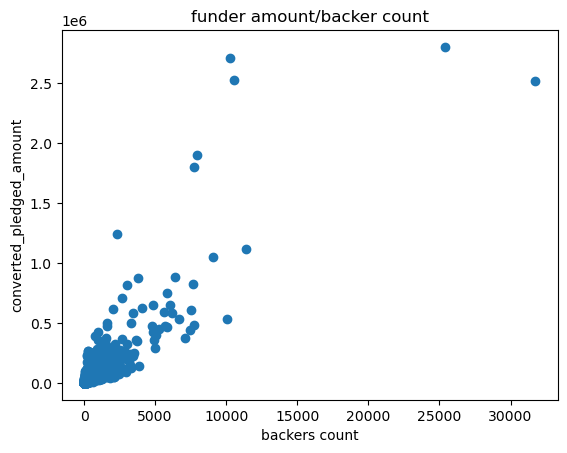

In [5]:
# Visualization
plt.scatter(df['backers_count'],df['converted_pledged_amount'])
plt.qqplot
plt.xlabel('backers count')
plt.ylabel('converted_pledged_amount')
plt.title('funder amount/backer count');

In [6]:
df['converted_pledged_amount'].fillna(df['converted_pledged_amount'].median(),inplace=True)
p_corr=stats.pearsonr(df['backers_count'],df['converted_pledged_amount'])
print('with a statistical value of',p_corr[0], 'and a p value of',p_corr[1],'we can say that these two variables are closely correlated')
print('There are notable examples of projects receiving high funding despite relatively low backer numbers')

with a statistical value of 0.862598983025971 and a p value of 0.0 we can say that these two variables are closely correlated
There are notable examples of projects receiving high funding despite relatively low backer numbers


####  2 US Bias

Is it better to be based in the US?

In [7]:
display(df['country'].value_counts())
print('The US has by far the most based projects')

US    2388
GB     361
CA     198
MX     105
HK      84
AU      82
IT      69
DE      67
FR      64
ES      48
JP      38
SE      28
NL      22
IE      20
DK      17
CH      15
SG      11
BE      10
NZ       7
AT       5
PL       4
LU       4
SI       2
NO       2
Name: country, dtype: int64

The US has by far the most based projects


we see multiple high rates combined with very small number of projects, to resolve this only countries with at least 10 Projects are included


C:\Users\bosse\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


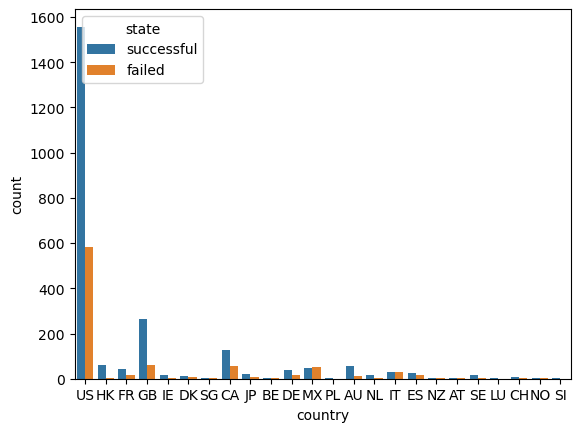

In [8]:
# we will only use inactive Projects for this analysis, projects have to be either failed or succeded
df_2=df[df['state'].isin(['successful','failed'])]
sns.countplot(df_2['country'],hue=df_2['state']);
print('we see multiple high rates combined with very small number of projects, to resolve this only countries with at least 10 Projects are included')

In [9]:
# Building of a DataFrame containing the successrate for different countries
add_country=[]
add_state=[]
for item in df_2['country'].unique().tolist():
    if len(df_2[(df_2['country']==item)])>10:
        rate=len(df_2[(df_2['country']==item) & (df_2['state']=='successful')])/len(df_2[(df_2['country']==item)])
        add_country.append(item)
        add_state.append(rate)
dic=({'country':add_country,'Sucessful Projects in %':add_state})
df_dic=pd.DataFrame(dic)
df_dic

,country,Sucessful Projects in %
0,US,0.728251
1,HK,0.951613
2,FR,0.732143
3,GB,0.816199
4,IE,0.842105
5,DK,0.625000
6,CA,0.696133
7,JP,0.760000
8,DE,0.698113
9,MX,0.494949


The average successrate is 0.7251187499969184 which is nearly exact the number of the us with 0.7282507015902713
It doesnt appear a US Base is an important factor in the successrate of a Project


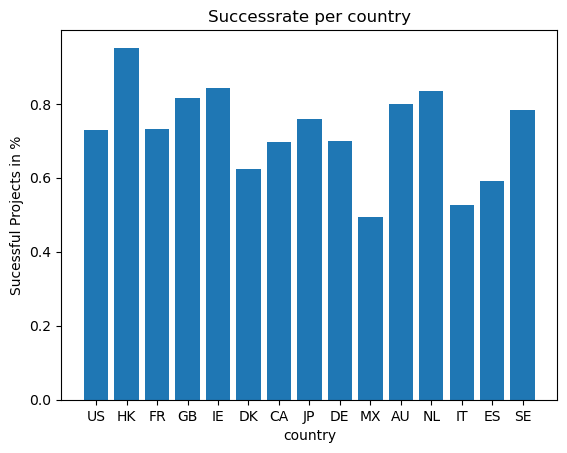

In [10]:
# Visualization and results
plt.bar(df_dic['country'],df_dic['Sucessful Projects in %'])
plt.xlabel('country')
plt.ylabel('Sucessful Projects in %')
plt.title('Successrate per country');
print('The average successrate is',df_dic['Sucessful Projects in %'].mean(),'which is nearly exact the number of the us with',df_dic['Sucessful Projects in %'][0])
print('It doesnt appear a US Base is an important factor in the successrate of a Project')

#### 3 US

In [11]:
df['currency'].value_counts()

USD    2388
GBP     361
EUR     320
CAD     198
MXN     105
HKD      84
AUD      82
JPY      38
SEK      27
CHF      14
DKK      13
SGD      11
NZD       7
NOK       2
PLN       1
Name: currency, dtype: int64

In [12]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type,created_year
0,58,"A portable parabolic microphone, designed to l...","{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",9999.0,ES,Spain,2023-04-27 15:41:23,"{""id"":1966732519,""name"":""Birdfox"",""slug"":""bird...",EUR,€,...,False,False,live,2023-05-16 14:58:11,1.085950,"{""web"":{""project"":""https://www.kickstarter.com...",1.086631,9992.908771,international,2023
1,5,Wirelessly control your Eurorack with your ent...,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",951.0,US,the United States,2023-03-16 18:43:13,"{""id"":1627984486,""name"":""Wray Bowling"",""slug"":...",USD,$,...,False,False,live,2023-05-13 08:42:46,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,951.000000,international,2023
2,167,Active Noise Cancelling | Hearing Protection M...,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",21747.0,US,the United States,2023-03-23 17:11:15,"{""id"":991035804,""name"":""ADV.SOUND"",""slug"":""adv...",USD,$,...,False,False,live,2023-05-09 15:30:08,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,21747.000000,international,2023
3,14,Acoustic Instruments for Pre-Talkers (Ages 1+),"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",839.0,CA,Canada,2022-09-06 11:57:27,"{""id"":679633310,""name"":""Treble-Starter"",""slug""...",CAD,$,...,False,False,live,2023-05-01 18:32:49,0.732306,"{""web"":{""project"":""https://www.kickstarter.com...",0.742165,828.450070,international,2023
4,33,And the last DJ mixer you will ever need.,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",47160.0,DE,Germany,2023-02-27 15:05:53,"{""id"":1392006048,""name"":""Menura Audio"",""slug"":...",EUR,€,...,False,True,live,2023-05-01 17:00:08,1.112751,"{""web"":{""project"":""https://www.kickstarter.com...",1.086631,48294.487055,international,2023


In [14]:
sns.lineplot(df['created_year'],len(df['state'][(df['state']=='failed')]))

KeyError: 'year'